In [ ]:
# Start wri#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Fake news detection
The naive bayes model
"""

from getEmbeddings import getEmbeddings
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import os










[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


# Read the data
if not os.path.isfile('./xtr.npy') or \
    not os.path.isfile('./xte.npy') or \
    not os.path.isfile('./ytr.npy') or \
    not os.path.isfile('./yte.npy'):
    xtr,xte,ytr,yte = getEmbeddings("datasets/train.csv")
    np.save('./xtr', xtr)
    np.save('./xte', xte)
    np.save('./ytr', ytr)
    np.save('./yte', yte)
xtr,xte,ytr,yte = getEmbeddings("datasets/train.csv")
np.save('./xtr', xtr)
np.save('./xte', xte)
np.save('./ytr', ytr)
np.save('./yte', yte)
xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')
ytr = np.where(ytr<1, 1, 0)
yte = np.where(yte<1, 1, 0)



In [ ]:
print(ytr)

[0 0 0 ... 0 0 0]


In [ ]:
# Use the built-in Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(xtr,ytr)
y_pred = gnb.predict(xte)
m = yte.shape[0]
tp=0
tn=0
fp=0
fn=0
for i in range(m):
    if (y_pred[i]==0 and (yte[i]!=y_pred[i])):
        fn+=1
    elif (y_pred[i]==1 and (yte[i]!=y_pred[i])):
        fp+=1
    elif (y_pred[i]==0 and (yte[i]==y_pred[i])):
        tn+=1
    elif (y_pred[i]==1 and (yte[i]==y_pred[i])):
        tp+=1

precision=(tp)/(tp+fp)*100
recall=(tp)/(tp+fn)*100
print("Accuracy = " + format((tp+tn)/(tp+tn+fp+fn)*100, '.2f') + "%")   
print("F1-Score = " + format(((2*precision*recall)/(precision+recall)), '.2f') + "%")   
print("Recall = " + format((tp)/(tp+fn)*100, '.2f') + "%")   
print("Precision = " + format((tp)/(tp+fp)*100, '.2f') + "%")   
print("Specificity = " + format((tn)/(tn+fp)*100, '.2f') + "%")  


Accuracy = 75.89%
F1-Score = 72.83%
Recall = 64.92%
Precision = 82.93%
Specificity = 86.75%


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


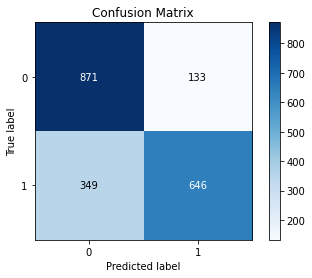

In [ ]:
# Draw the confusion matrix
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte, ypred)
    plt.grid(False)
    plt.show()
plot_cmat(yte, y_pred)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a2c2a1b-c190-4238-a7b0-93cabb99b4e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>